In [2]:
import pandas as pd
import csv
import seaborn as sns
import numpy as np

df1 = pd.read_csv("workshops/Week 9/part1/price_demand_data.csv")
df2 = pd.read_csv("workshops/Week 9/part1/weather_data.csv")

In [3]:
# price_demand_data = df1
# weather_data = df2
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


In [4]:
df1.groupby('SETTLEMENTDATE')['TOTALDEMAND'].max()

SETTLEMENTDATE
1/01/2021 0:30     4179.21
1/01/2021 10:00    3336.79
1/01/2021 10:30    3333.31
1/01/2021 11:00    3275.27
1/01/2021 11:30    3291.46
                    ...   
9/08/2021 7:30     5843.21
9/08/2021 8:00     6158.28
9/08/2021 8:30     6372.55
9/08/2021 9:00     6519.36
9/08/2021 9:30     6493.33
Name: TOTALDEMAND, Length: 11664, dtype: float64

In [5]:
# get the dd/mm/yyyy field from SETTLEMENTDATE so we can join it with the weather
df1['Date'] = df1['SETTLEMENTDATE'].apply(lambda x: x.split()[0])
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021


In [19]:
# find max
#new_df2.groupby('Date', axis=0).max()

In [6]:
df2.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [7]:
# merging to datasets
data = df1.merge(df2, left_on='Date', right_on='Date')
data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [8]:
#cleaning data from data
new_df=data.drop(['Evaporation (mm)', 'Sunshine (hours)','Direction of maximum wind gust ','Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'], axis = 1)
new_df

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h)
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,15.6,29.9,0.0,31.0
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,15.6,29.9,0.0,31.0
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,15.6,29.9,0.0,31.0
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,15.6,29.9,0.0,31.0
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,15.6,29.9,0.0,31.0
...,...,...,...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,31/08/2021,11.0,20.1,0.0,61.0
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,11.0,20.1,0.0,61.0
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,11.0,20.1,0.0,61.0
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,11.0,20.1,0.0,61.0


In [9]:
new_df.groupby('Date')['TOTALDEMAND'].max()

Date
1/01/2021    5019.64
1/02/2021    5228.29
1/03/2021    5225.37
1/04/2021    5807.02
1/05/2021    5261.09
              ...   
9/04/2021    5688.63
9/05/2021    5222.89
9/06/2021    7224.91
9/07/2021    7536.11
9/08/2021    6675.69
Name: TOTALDEMAND, Length: 243, dtype: float64

In [10]:
new_df.isnull().sum()

REGION                                 0
SETTLEMENTDATE                         0
TOTALDEMAND                            0
PRICECATEGORY                          0
Date                                   0
Minimum temperature (°C)              48
Maximum temperature (°C)              48
Rainfall (mm)                         96
Speed of maximum wind gust (km/h)    144
dtype: int64

In [11]:
# find max
new_df.groupby('Date', axis=0).max()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h)
Date,,,,,,,,
1/01/2021,VIC1,1/01/2021 9:30,5019.64,LOW,15.6,29.9,0.0,31.0
1/02/2021,VIC1,1/02/2021 9:30,5228.29,MEDIUM,13.4,20.3,0.0,33.0
1/03/2021,VIC1,1/03/2021 9:30,5225.37,LOW,13.8,21.7,0.0,44.0
1/04/2021,VIC1,1/04/2021 9:30,5807.02,MEDIUM,12.4,29.9,0.0,20.0
1/05/2021,VIC1,1/05/2021 9:30,5261.09,MEDIUM,11.2,24.6,0.0,33.0
...,...,...,...,...,...,...,...,...
9/04/2021,VIC1,9/04/2021 9:30,5688.63,MEDIUM,13.8,17.3,6.2,35.0
9/05/2021,VIC1,9/05/2021 9:30,5222.89,MEDIUM,11.0,20.5,0.4,28.0
9/06/2021,VIC1,9/06/2021 9:30,7224.91,MEDIUM,7.8,14.7,4.0,67.0


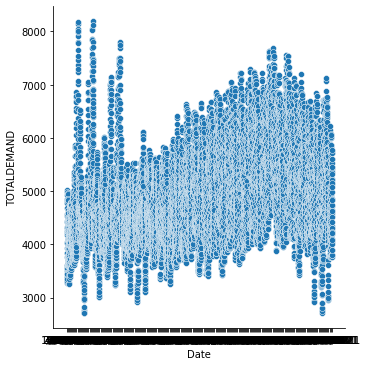

In [12]:
sns.relplot(x='Date', y='TOTALDEMAND', data=new_df)

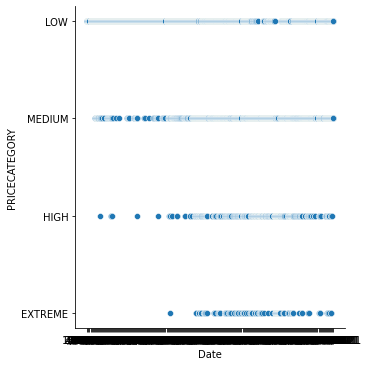

In [13]:
sns.relplot(x='Date', y='PRICECATEGORY', data=new_df)

In [14]:
import matplotlib.pyplot as plt

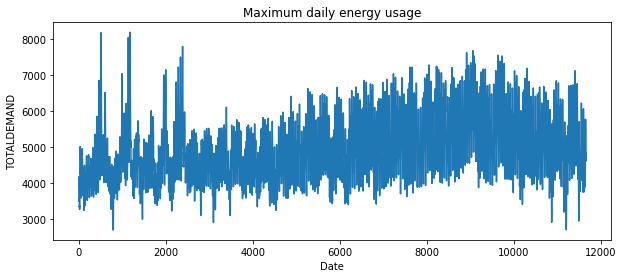

In [15]:
plt.figure(figsize=(10, 4))
plt.title("Maximum daily energy usage")
plt.xlabel("Date")
plt.ylabel("TOTALDEMAND")
plt.plot(data["TOTALDEMAND"])
plt.show()

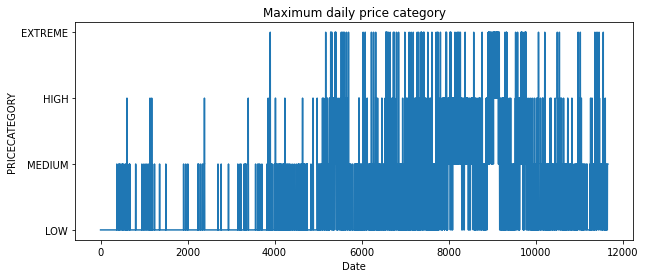

In [16]:
plt.figure(figsize=(10, 4))
plt.title("Maximum daily price category")
plt.xlabel("Date")
plt.ylabel("PRICECATEGORY")
plt.plot(data["PRICECATEGORY"])
plt.show()

                                   TOTALDEMAND  Minimum temperature (°C)  \
TOTALDEMAND                           1.000000                 -0.292162   
Minimum temperature (°C)             -0.292162                  1.000000   
Maximum temperature (°C)             -0.225568                  0.707486   
Rainfall (mm)                        -0.039625                  0.043942   
Speed of maximum wind gust (km/h)     0.039760                  0.055775   

                                   Maximum temperature (°C)  Rainfall (mm)  \
TOTALDEMAND                                       -0.225568      -0.039625   
Minimum temperature (°C)                           0.707486       0.043942   
Maximum temperature (°C)                           1.000000      -0.125289   
Rainfall (mm)                                     -0.125289       1.000000   
Speed of maximum wind gust (km/h)                 -0.056278       0.042287   

                                   Speed of maximum wind gust (km/h)  
TOT

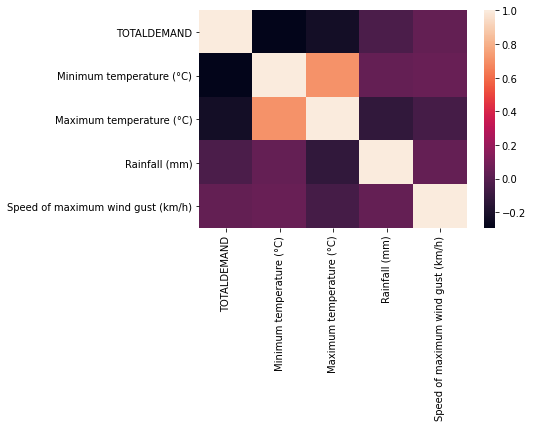

In [17]:
print(new_df.corr())
sns.heatmap(new_df.corr())
plt.show()

In [ ]:
#model

In [25]:
x = data[["Minimum temperature (°C)", "Maximum temperature (°C)", "Rainfall (mm)"]]
y = data["TOTALDEMAND"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
model = DecisionTreeRegressor()

In [36]:
#model.fit(xtrain, ytrain)

In [34]:
#ypred = model.predict(xtest)

In [35]:
#data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
#print(data.head())

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
x = np.array(data.drop(["REGION"], 1))
y = np.array(data["REGION"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

ValueError: could not convert string to float: '28/01/2021 1:00'

In [ ]:
data = pd.DataFrame(data={"Predicted Sales": ypred.flatten()})
print(data)